<a href="https://colab.research.google.com/github/tkhan3/machinelearning/blob/master/hr_analytics_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}
#import pandas as pd
!google-drive-ocamlfuse drive
!apt-get -qq install -y graphviz && pip install -q pydot
!pip3 install seaborn==0.9.0
import pydot
!mkdir -p drive
!google-drive-ocamlfuse drive

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 110845 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=ht

In [0]:
import pandas as pd
from datetime import datetime
import os

drive_path = 'drive/DL_COLAB/'

HR_ANALYTICS_PATH = os.path.join(drive_path,"hr_analytics")

In [79]:
print (HR_ANALYTICS_PATH)

drive/DL_COLAB/hr_analytics


In [0]:
import pandas as pd

def load_hr_data(filename, file_path=HR_ANALYTICS_PATH):
    csv_path = os.path.join(file_path, filename)
    return pd.read_csv(csv_path,sep="|")

In [0]:
hr_data_full = load_hr_data("new_Attrition_Data.csv")

In [0]:
hr_data_full_trim = hr_data_full[["Age","Attrition","BusinessTravel","Department","DistanceFromHome","Education","Gender","HourlyRate","JobInvolvement","JobLevel","JobRole","JobSatisfaction","MaritalStatus","MonthlyIncome","NumCompaniesWorked","PercentSalaryHike","PerformanceRating","StockOptionLevel","TotalWorkingYears","TrainingTimesLastYear","WorkLifeBalance","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager","OverTime"]]

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(hr_data_full, hr_data_full["Attrition"]):
    hr_data_train = hr_data_full_trim.loc[train_index]
    hr_data_test = hr_data_full_trim.loc[test_index]

In [84]:
hr_data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176 entries, 1194 to 1292
Data columns (total 26 columns):
Age                        1176 non-null int64
Attrition                  1176 non-null object
BusinessTravel             1176 non-null object
Department                 1176 non-null object
DistanceFromHome           1176 non-null int64
Education                  1176 non-null int64
Gender                     1176 non-null object
HourlyRate                 1176 non-null int64
JobInvolvement             1176 non-null int64
JobLevel                   1176 non-null int64
JobRole                    1176 non-null object
JobSatisfaction            1176 non-null int64
MaritalStatus              1176 non-null object
MonthlyIncome              1176 non-null int64
NumCompaniesWorked         1176 non-null int64
PercentSalaryHike          1176 non-null int64
PerformanceRating          1176 non-null int64
StockOptionLevel           1176 non-null int64
TotalWorkingYears          1176 non-nu

In [0]:
hr_data_train_label = hr_data_train["Attrition"].copy()
hr_data_test_label =  hr_data_test["Attrition"].copy()

hr_data_train = hr_data_train.drop("Attrition",axis=1)
hr_data_test = hr_data_test.drop("Attrition",axis=1)


In [86]:
hr_data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176 entries, 1194 to 1292
Data columns (total 25 columns):
Age                        1176 non-null int64
BusinessTravel             1176 non-null object
Department                 1176 non-null object
DistanceFromHome           1176 non-null int64
Education                  1176 non-null int64
Gender                     1176 non-null object
HourlyRate                 1176 non-null int64
JobInvolvement             1176 non-null int64
JobLevel                   1176 non-null int64
JobRole                    1176 non-null object
JobSatisfaction            1176 non-null int64
MaritalStatus              1176 non-null object
MonthlyIncome              1176 non-null int64
NumCompaniesWorked         1176 non-null int64
PercentSalaryHike          1176 non-null int64
PerformanceRating          1176 non-null int64
StockOptionLevel           1176 non-null int64
TotalWorkingYears          1176 non-null int64
TrainingTimesLastYear      1176 non-nul

In [87]:
print (hr_data_train.shape)
print (hr_data_test.shape)

(1176, 25)
(294, 25)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f873c6b1e10>,
      dtype=object)

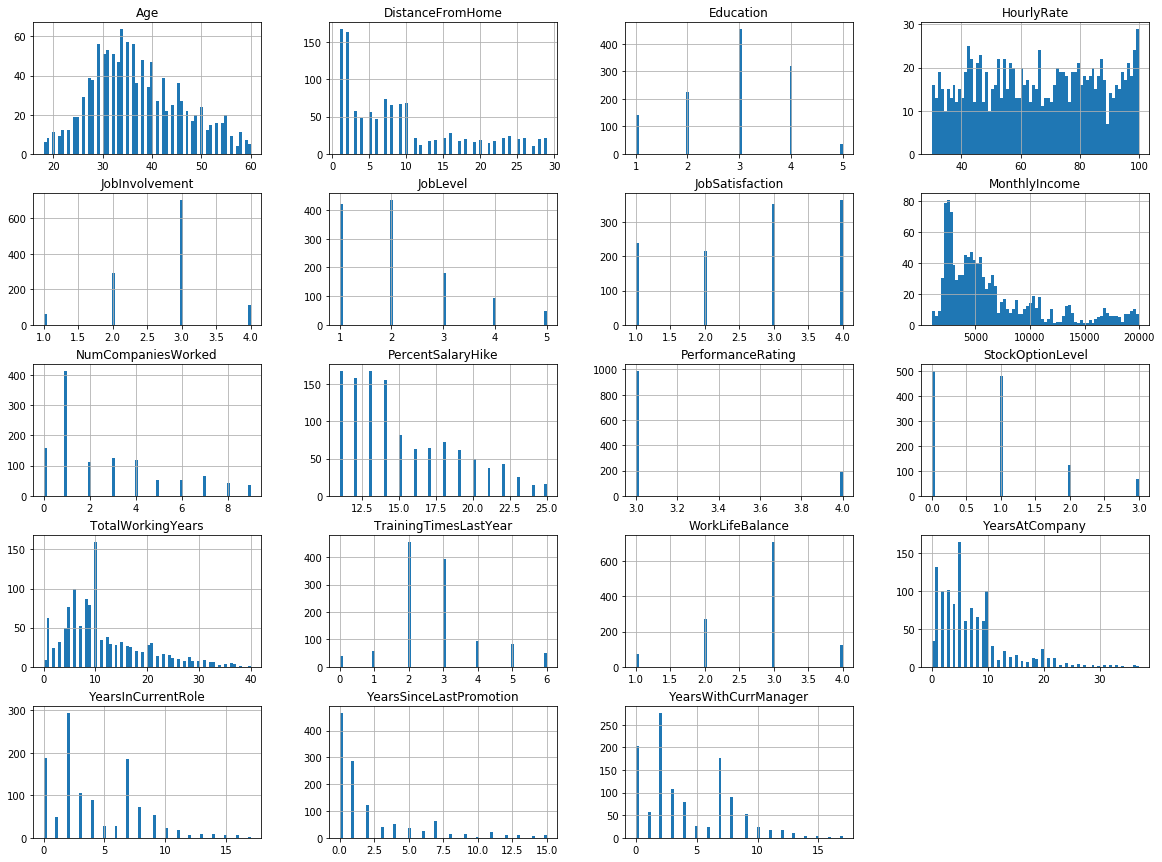

In [88]:
hr_data_train.hist(bins=70, figsize=(20,15))

In [0]:
cat_attribute = ["BusinessTravel","Department","Gender","JobRole","MaritalStatus","OverTime"]

In [0]:
numeric_atribute = list(set(hr_data_train.columns) ^ set (cat_attribute))

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import FeatureUnion

from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+

In [0]:
imputer = SimpleImputer(strategy="median")

In [0]:
# Inspired from stackoverflow.com/questions/25239958
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],index=X.columns)
        return self
    def transform(self, X, y=None):
    #    return X.fillna(self.most_frequent_)
        return X

In [0]:
# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [0]:
num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(numeric_atribute)),
        ("imputer", SimpleImputer(strategy="median")),
    ])

In [0]:
cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(cat_attribute)),
#        ("imputer", MostFrequentImputer()),
        ("cat_encoder",OneHotEncoder(sparse=False,handle_unknown='ignore' )),
        ])

In [0]:
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [0]:
X_train  = preprocess_pipeline.fit_transform(hr_data_train)

In [218]:
X_train.shape

(1176, 70)

In [219]:
y_train.shape

(1176,)

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [0]:
y_train = le.fit_transform(hr_data_train_label)
y_test = le.fit_transform(hr_data_train_label)

In [222]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
x_test =  preprocess_pipeline.transform(hr_data_test)

In [225]:
print (x_test.shape)

(294, 70)


In [0]:
y_pred = svm_clf.predict(x_test)

In [228]:
from sklearn.model_selection import cross_val_score

svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.8384325655512097

In [229]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.8562653918586122